In [2]:
import numpy as np

## TASK 1

In [4]:
def model(u,t,Sig,m,n,K,K1,K2):
    R , I = u
    drdt = Sig*(1-R)/(1+I**m)-R
    didt = (K1*R**n)/(R**n+K**n) - K2*I
    return drdt,didt


In [40]:
t = np.linspace(0,5,20)

I = 1 / (2 + t)
R =  t / (t + 1)

Text(0, 0.5, 'I')

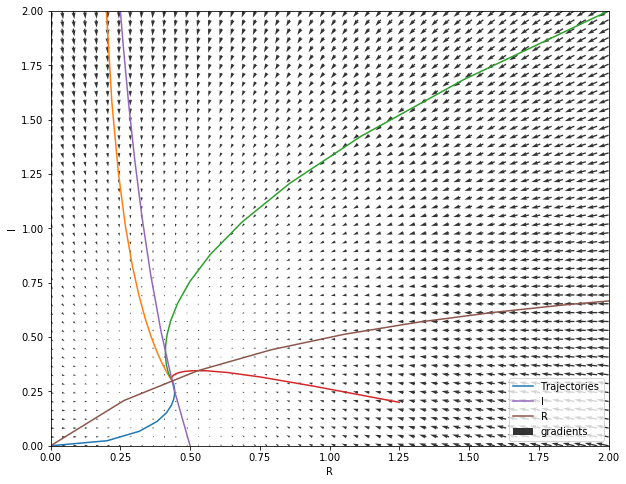

In [55]:
#itialization of conditions
Sig=K1=K2=K=m=n=1
xt,yt = np.meshgrid(np.linspace(0,2,50),np.linspace(0,2,50))
u = np.zeros_like(xt)
v = np.zeros_like(yt)
for i in range(len(xt)):
    for j in range(len(yt)):
        z = model(np.array([xt[i,j],yt[i,j]]),t,Sig,m,n,K,K1,K2)
        u[i,j] = z[0]
        v[i,j] = z[1]

from scipy.integrate import odeint
U1 = odeint(model,[0,0],t, (Sig,m,n,K,K1,K2))
U2 = odeint(model, [0.2, 2],t, (Sig,m,n,K,K1,K2))
U3 = odeint(model,[2,2],t, (Sig,m,n,K,K1,K2))
U4 = odeint(model,[1.25, 0.2],t, (Sig,m,n,K,K1,K2))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlim([0,2])
plt.ylim([0,2])
#widths = np.linspace(0, 2, xt.size)
plt.quiver(xt,yt,u,v,alpha = 0.8,color = 'k',label='gradients')
plt.plot(U1[:,0],U1[:,1],label='Trajectories')
plt.plot(U2[:,0],U2[:,1])
plt.plot(U3[:,0],U3[:,1])
plt.plot(U4[:,0],U4[:,1])
plt.plot(I, t, label='I')
plt.plot(t, R, label='R')
plt.legend(loc='best')
plt.xlabel('R')
plt.ylabel('I')

## TASK2

In [97]:
def Gillespie(x_0,t_f):
    x1, x2, x3, x4 = x_0
    lambd = 10**-4
    delta = 10 **-8
    beta = 5 * 10**-5
    kr = 0.3
    t = 0
    X_trace = [x_0]
    t_trace = [0]
    Nr = np.array(([1,-1,-1,0,0,0],[0,0,1,-1,-1,0],[0,0,0,0,1,-1],[0,0,0,1,0,0]))
    while t<t_f:
        alpha = [lambd, delta*x1, beta*x1*x2, 3*10**7*delta*x2, kr*x2, delta*x3]
        W = np.sum(alpha)
        u1 = np.random.rand()
        tau = -np.log(u1)/W
        r = np.where(np.cumsum(alpha)>=W*np.random.rand())[0][0]
        
        while alpha[r] == 0:
            r = r +1
        x1 = x1 + Nr[0][r]
        x2 = x2 + Nr[1][r]
        x3 = x3 + Nr[2][r]
        x4 = x4 + Nr[3][r]
        t = t + tau
        #if t < t_f:
        X_trace.append([x1,x2,x3,x4])
        t_trace.append(t)
    return X_trace,t_trace

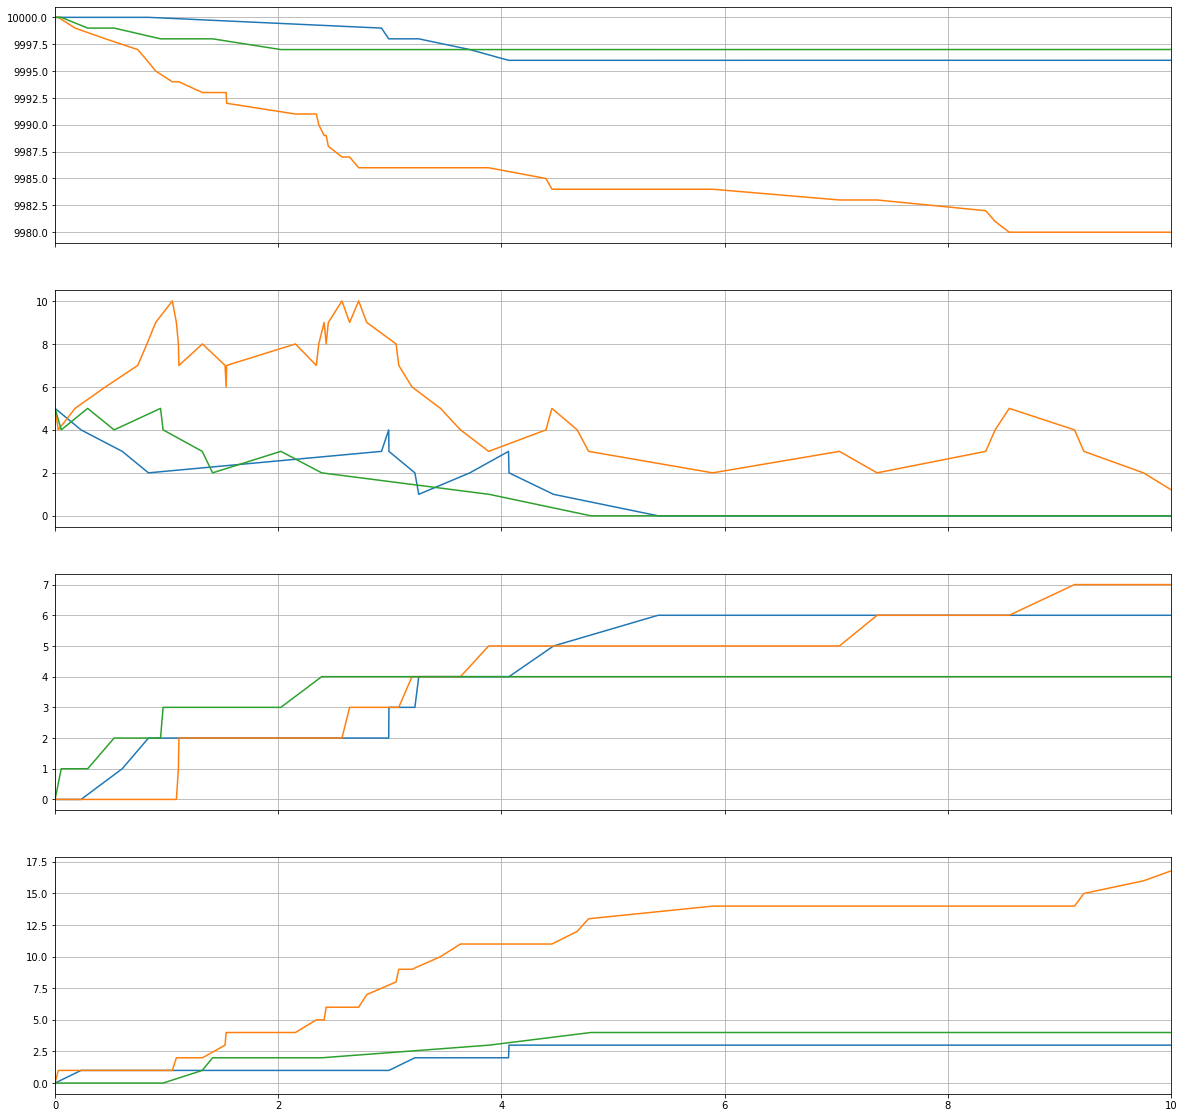

In [111]:
x_0 = [10000, 5, 0 , 0]
t_f = 10

 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,20),sharex=True)
plt.xlim([0,10])
plt.grid()
for i in range(3):
    X_trace, t_trace = Gillespie(x_0, t_f)
    
    
    ax1.plot(t_trace,np.array(X_trace)[:,0])
    ax1.grid()
    ax2.plot(t_trace,np.array(X_trace)[:,1])
    ax2.grid()
    ax3.plot(t_trace,np.array(X_trace)[:,2])
    ax3.grid()
    ax4.plot(t_trace,np.array(X_trace)[:,3])

plt.show()

In [113]:
t_traces = []
x_traces = [[],[]]
for i in range(1000):
    X_trace, t_trace = Gillespie(x_0, t_f)
    t_traces.append(t_trace)
    x_traces[0].append(np.asarray(X_trace)[-1,1])
    x_traces[1].append(np.asarray(X_trace)[-1,2])


In [114]:
prob1 = []
prob2 = []
for i in range(21):
    prob1.append(len((np.where(np.array(x_traces[0])==i)[0]))/1000)
for j in range(36):
    prob2.append(len((np.where(np.array(x_traces[1])==j)[0]))/1000)

Text(0, 0.5, 'Simulations')

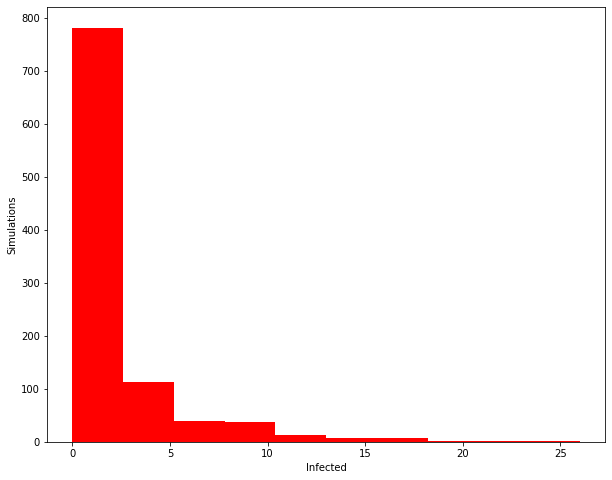

In [127]:
plt.figure(figsize=(10,8))
plt.hist(x_traces[0],color='r')
plt.xlabel('Infected')
plt.ylabel('Simulations')

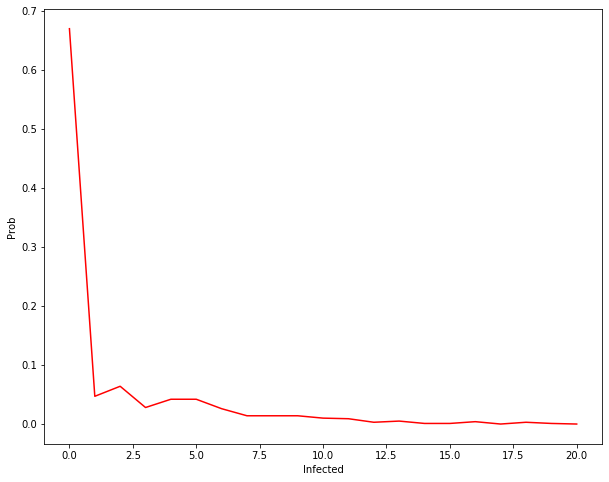

In [124]:
plt.figure(figsize=(10,8))
plt.plot(range(21), prob1,color='r')
plt.xlabel('Infected')
plt.ylabel('Prob')
plt.show()

Text(0, 0.5, 'Simulations')

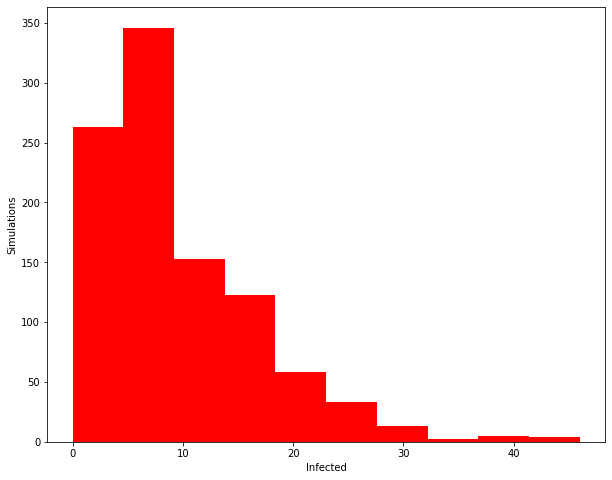

In [128]:
plt.figure(figsize=(10,8))
plt.hist(x_traces[1],color='r')
plt.xlabel('Infected')
plt.ylabel('Simulations')

Text(0, 0.5, 'Prob')

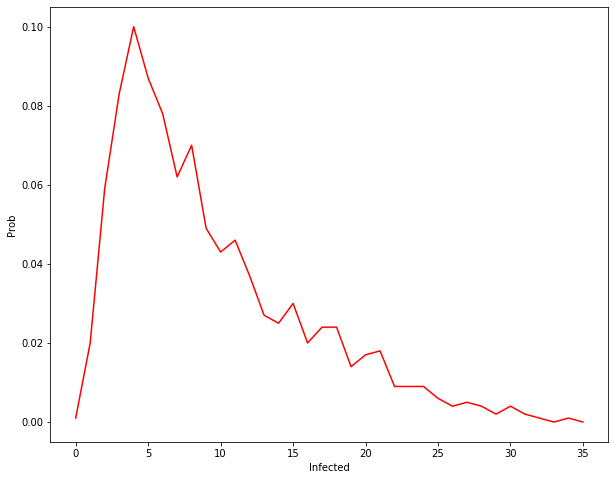

In [130]:
plt.figure(figsize=(10,8))
plt.plot(range(36), prob2,color='r')
plt.xlabel('Infected')
plt.ylabel('Prob')

In [135]:
print('Probability of ongoing infection at T = 10 is %.2f'%np.array(prob2[-1]))

Probability of ongoing infection at T = 10 is 0.00


In [140]:
print('Average +/- Standard Deviated = %d +- %.2f'%(np.array(x_traces[1]).mean(),np.array(x_traces[1]).std()))


Average +/- Standard Deviated = 9 +- 7.15
